## Image recognition with ColorThief

#### class ExtractColor takes two attributes: 
* path (to folder with images)
* number_of_colors (the number of palette colors)

Note: when adding path, make sure to add "r" before the string like:
path = r'C:\daniel\images'

In [216]:
from colorthief import ColorThief
import webcolors as wc
import numpy as np
import pandas as pd
from collections import Counter
import os
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from operator import itemgetter

In [336]:
class ExtractColor():
    def __init__(self, path, number_of_colors):
        self.path = path
        self.number_of_colors = number_of_colors
    
    def get_rgb_colors(self):
        
        #access images from a folder
        all_images = [file for file in os.listdir(self.path)]
        #print(all_images)
        
        #loop through files -> getting dominant/pallete
        #returns list of rgb
        dominant_colors = []
        palette_colors = []

        for image in all_images:
            #image = 'images/' + image
            color_thief = ColorThief(path+"\\"+image)
            domintant_color = color_thief.get_color(quality=1)
            palette = color_thief.get_palette(color_count=self.number_of_colors)
            dominant_colors.append(domintant_color)
            palette_colors.append(palette) 
        return [dominant_colors, palette_colors]
        
    def get_eng_colors(self):  
        #convert
        
        dominant_colors = self.get_rgb_colors()
        palette_colors = self.get_rgb_colors()
        
        dominant_colors_english = []
        palette_colors_english = []

        for color_rgb in dominant_colors[0]:
            dominant_colors_english.append(self.get_color_name(wc.rgb_to_hex(color_rgb)))
    
        for colors_list in palette_colors[1]:
            for color_rgb in colors_list:
                palette_colors_english.append(self.get_color_name(wc.rgb_to_hex(color_rgb)))
        #return dominant_colors_english, palette_colors_english  
        #BELOW IS JUST AN ADDITION TO MAKE IT COUNT ITEMS IN A LIST
        
        return [dict(Counter(dominant_colors_english)), dict(Counter(palette_colors_english))]
        
    def get_approx_color(self, hex_color):
        orig = wc.hex_to_rgb(hex_color)
        similarity = {}
        for hex_code, color_name in wc.css3_hex_to_names.items():
            approx = wc.hex_to_rgb(hex_code)
            similarity[color_name] = sum(np.subtract(orig, approx) ** 2)
        return min(similarity, key=similarity.get)

    def get_color_name(self, hex_color):
        try:
            return wc.hex_to_name(hex_color)
        except ValueError:
            return self.get_approx_color(hex_color)
        
def create_charts(lists_of_colors):
    
    sorted_lists_order = []
    for type_of_color in lists_of_colors:
        sorted_lists_order.append(sorted(type_of_color.items(), key=itemgetter(1)))
    
    dominant_colors_sorted = []
    for eng_color in sorted_lists_order[0][::-1]:
        dominant_colors_sorted.append(matplotlib.colors.cnames[eng_color[0]])
    palette_colors_sorted = []
    for eng_color in sorted_lists_order[1][::-1]:
        palette_colors_sorted.append(matplotlib.colors.cnames[eng_color[0]])
    
    dominant_colors_sorted_eng = []
    for x in sorted_lists_order[0][::-1]:
        dominant_colors_sorted_eng.append(x[0])
    
    palette_colors_sorted_eng = []
    for x in sorted_lists_order[1][::-1]:
        palette_colors_sorted_eng.append(x[0])
    
    
    
    # return pie chart of dominant colors
    plt.figure(figsize = (8, 6))
    plt.pie(lists_of_colors[0].values(),labels = dominant_colors_sorted_eng, labeldistance=1.2, autopct='%1.0f%%',pctdistance=1.1, colors = dominant_colors_sorted)
    
    # return pie chart of palette colors
    plt.figure(figsize = (8, 6))
    plt.pie(lists_of_colors[1].values(),labels =palette_colors_sorted_eng, labeldistance=1.2, autopct='%1.0f%%',pctdistance=1.1, colors = palette_colors_sorted)
    
    return dominant_colors_sorted,palette_colors_sorted ,dominant_colors_sorted_eng,  palette_colors_sorted_eng

In [339]:
path = r'C:\Users\Daniel\Desktop\Daniel Working Folder\Reports\Marketing Ways - Polish Competition\Online Shops\emag\Haloween'
emag_bw = ExtractColor(path, 5)

In [340]:
blackweek = emag_bw.get_eng_colors()

In [341]:
blackweek

[{'burlywood': 3},
 {'burlywood': 3,
  'black': 2,
  'darkorange': 2,
  'orangered': 2,
  'lightgrey': 2,
  'chocolate': 1,
  'gainsboro': 1,
  'darkslategrey': 1,
  'coral': 1}]

(['#DEB887'],
 ['#DEB887',
  '#D3D3D3',
  '#FF4500',
  '#FF8C00',
  '#000000',
  '#FF7F50',
  '#2F4F4F',
  '#DCDCDC',
  '#D2691E'],
 ['burlywood'],
 ['burlywood',
  'lightgrey',
  'orangered',
  'darkorange',
  'black',
  'coral',
  'darkslategrey',
  'gainsboro',
  'chocolate'])

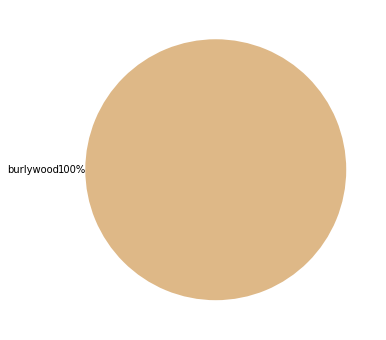

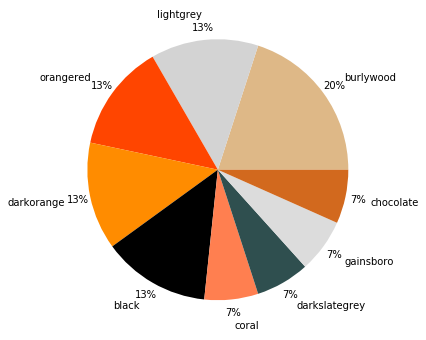

In [342]:
create_charts(blackweek)

[1, 1, 1, 2]